In [1]:
# Loan_ID - Unique Loan ID
# Gender - Male/ Female
# Married - Applicant married (Y/N)
# Dependents - Number of dependents
# Education - Applicant Education (Graduate/ Under Graduate)
# Self_Employed - Self employed (Y/N)
# ApplicantIncome - Applicant income
# CoapplicantIncome - Coapplicant income
# LoanAmount - Loan amount in thousands
# Loan_Amount_Term - Term of loan in months
# Credit_History - credit history meets guidelines
# Property_Area - Urban/ Semi Urban/ Rural
# Loan_Status - Loan approved (Y/N)

In [2]:
import pandas as pd
import numpy as np
import sklearn
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

In [3]:
loan_data = pd.read_csv('train.csv', sep=',', header=0)

In [4]:
loan_data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
66,LP001228,Male,No,0,Not Graduate,No,3200,2254.0,126.0,180.0,0.0,Urban,N
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.0,158.0,360.0,1.0,Urban,Y
321,LP002053,Male,Yes,3+,Graduate,No,4342,189.0,124.0,360.0,1.0,Semiurban,Y
263,LP001871,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,Y
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
99,LP001343,Male,Yes,0,Graduate,No,1759,3541.0,131.0,360.0,1.0,Semiurban,Y
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
436,LP002398,Male,No,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban,Y
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban,Y


In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
null_counts = loan_data.isnull().sum()

In [8]:
null_counts[null_counts > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [9]:
loan_data[loan_data.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


In [10]:
dropped_data = loan_data[loan_data.isnull().any(axis=1)]

In [11]:
loan_data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [12]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
import matplotlib.pyplot as plt

In [22]:
loan_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [24]:
# Correlation Matrix of All Numeric variables

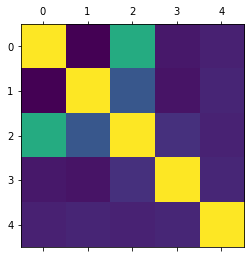

In [25]:
plt.matshow(loan_data.corr())


In [26]:
plt.show()

In [27]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


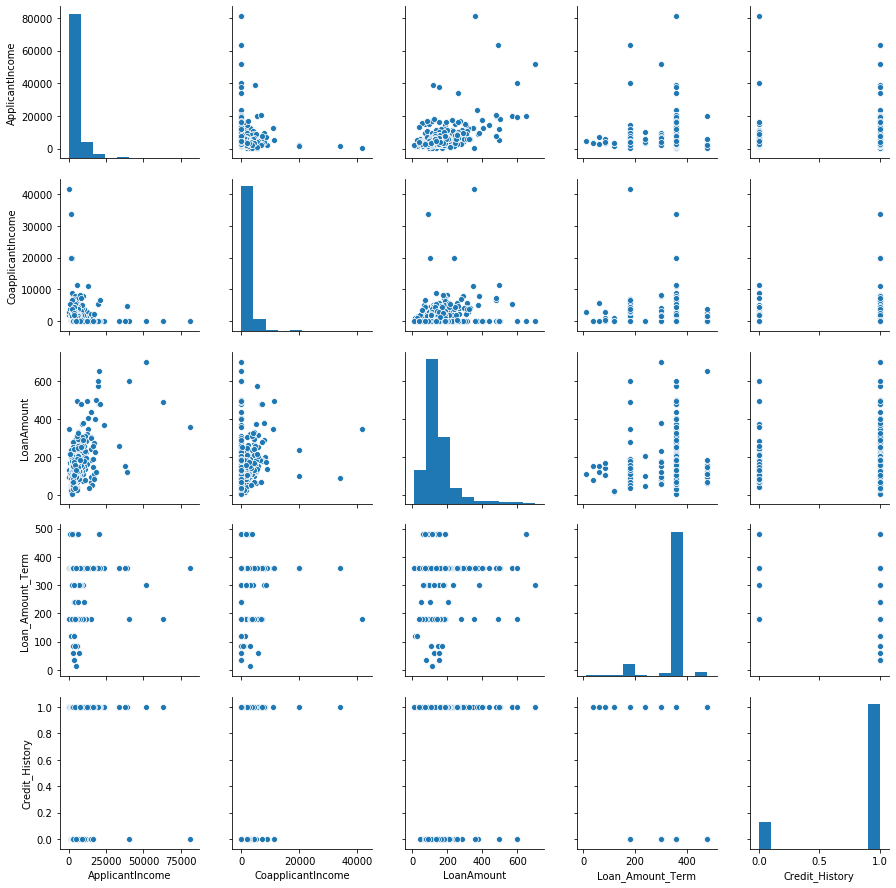

In [28]:
sns.pairplot(loan_data)

In [40]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
loan_data.loc[:,'ApplicantIncome'].astype('float64')

0       5849.0
1       4583.0
2       3000.0
3       2583.0
4       6000.0
5       5417.0
6       2333.0
7       3036.0
8       4006.0
9      12841.0
10      3200.0
11      2500.0
12      3073.0
13      1853.0
14      1299.0
15      4950.0
16      3596.0
17      3510.0
18      4887.0
19      2600.0
20      7660.0
21      5955.0
22      2600.0
23      3365.0
24      3717.0
25      9560.0
26      2799.0
27      4226.0
28      1442.0
29      3750.0
        ...   
584     2787.0
585     4283.0
586     2297.0
587     2165.0
588     4750.0
589     2726.0
590     3000.0
591     6000.0
592     9357.0
593     3859.0
594    16120.0
595     3833.0
596     6383.0
597     2987.0
598     9963.0
599     5780.0
600      416.0
601     2894.0
602     5703.0
603     3676.0
604    12000.0
605     2400.0
606     3400.0
607     3987.0
608     3232.0
609     2900.0
610     4106.0
611     8072.0
612     7583.0
613     4583.0
Name: ApplicantIncome, Length: 614, dtype: float64

In [43]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
loan_data.loc[:,'ApplicantIncome'] = loan_data.loc[:,'ApplicantIncome'].astype('float64')

In [45]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

KeyError: 'Loan_Status'

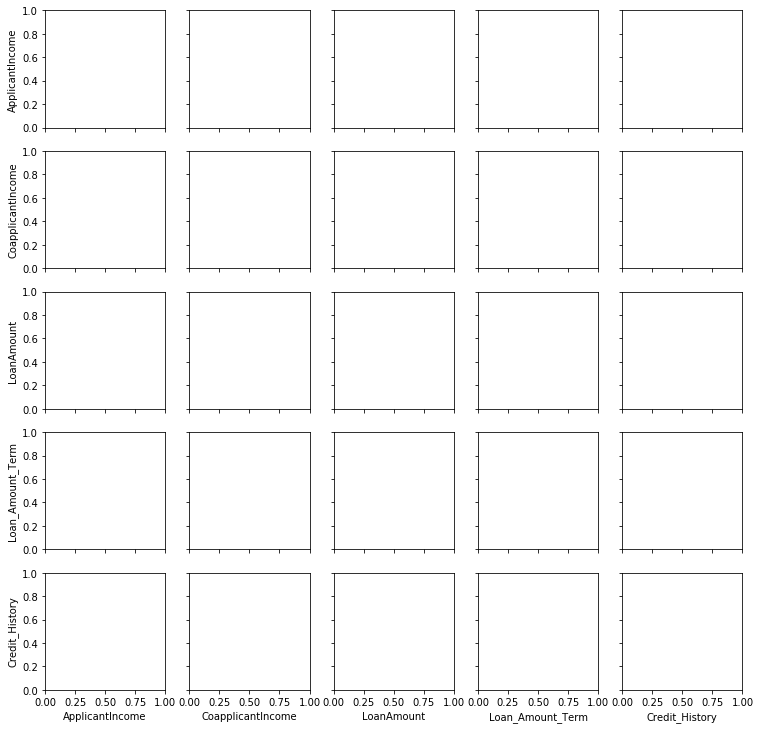

In [48]:
sns.pairplot(loan_data.loc[:,loan_data.dtypes == 'float64'], hue='Loan_Status')

ValueError: array must not contain infs or NaNs

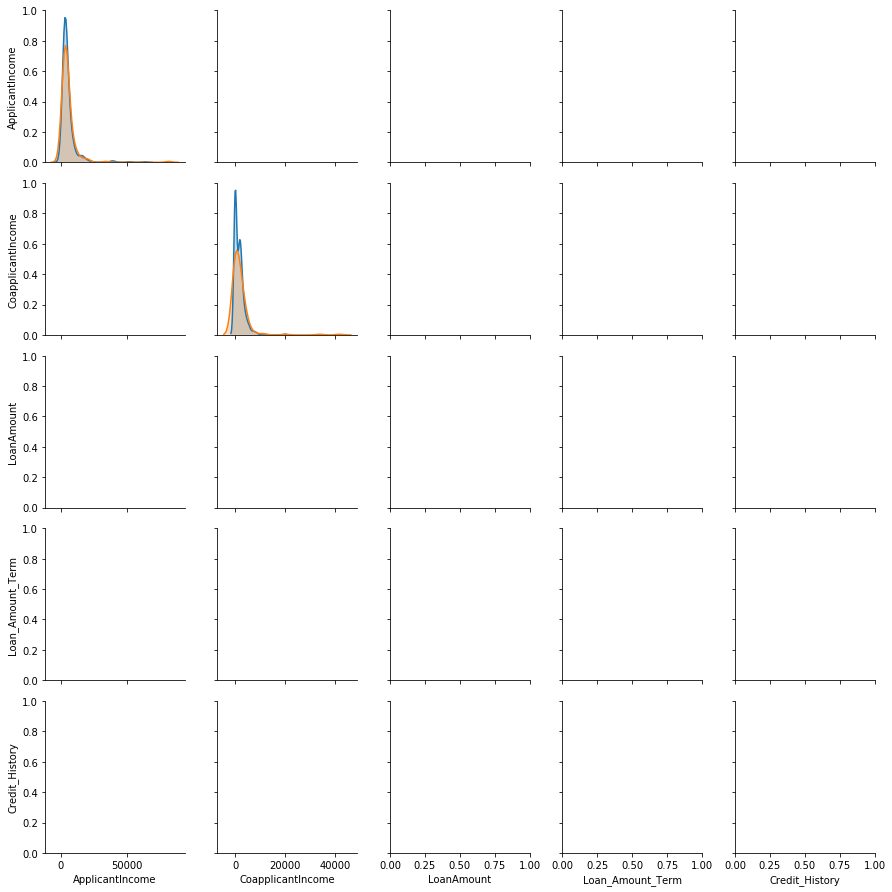

In [49]:
sns.pairplot(loan_data, hue='Loan_Status')

In [50]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
loan_data = loan_data.dropna()

In [53]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

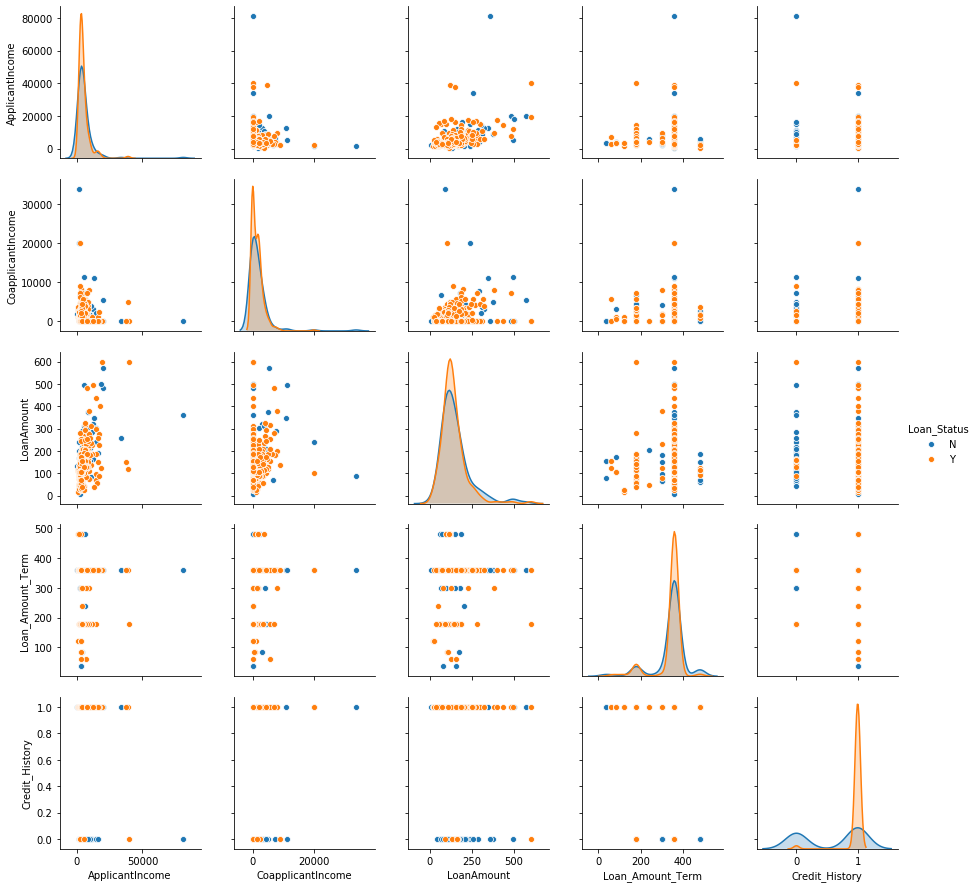

In [54]:
sns.pairplot(loan_data, hue='Loan_Status')

In [63]:
corr = loan_data.loc[:,loan_data.dtypes == 'float64'].corr()

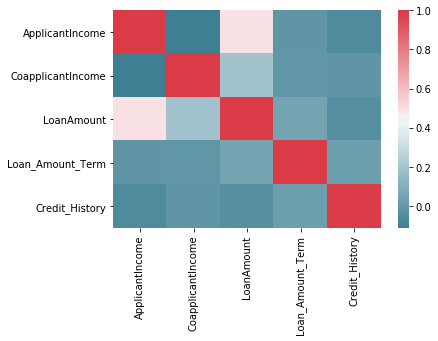

In [64]:
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [65]:
# Applicant income is somewhat correlated with loan amount,
# ie the more applicants earn the greater the amount they apply to borrow
# Coapplicant income has is correlatted with loan amount,
# but to a lesser extent that applicant income

In [66]:
# Now to visualise the catergoric variables in the dataset

In [67]:
from bokeh.layouts import row

In [69]:
loan_data.loc[:,loan_data.dtypes == 'object'].sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
351,LP002140,Male,No,0,Graduate,No,Rural,N
96,LP001327,Female,Yes,0,Graduate,No,Semiurban,Y
595,LP002940,Male,No,0,Not Graduate,No,Rural,Y
399,LP002287,Female,No,0,Graduate,No,Semiurban,N
172,LP001586,Male,Yes,3+,Not Graduate,No,Rural,N
552,LP002785,Male,Yes,1,Graduate,No,Urban,Y
408,LP002315,Male,Yes,1,Graduate,No,Semiurban,N
418,LP002345,Male,Yes,0,Graduate,No,Rural,Y
294,LP001947,Male,Yes,0,Graduate,No,Semiurban,Y
32,LP001097,Male,No,1,Graduate,Yes,Rural,N


In [74]:
loan_data.loc[:,'Married'].nunique()

2

In [104]:
loan_data.loc[loan_data['Married'] == 'Yes',['Loan_Status']]

,Loan_Status
1,N
2,Y
3,Y
5,Y
6,Y
7,N
8,Y
9,N
10,Y
12,Y


In [105]:
married = loan_data.loc[loan_data['Married'] == 'Yes',['Loan_Status']]

In [106]:
type(married)

pandas.core.frame.DataFrame

In [109]:
# Married people

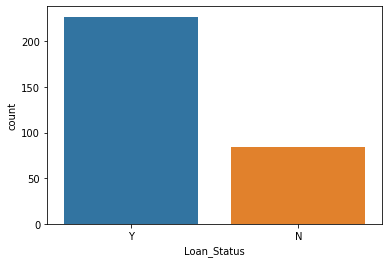

In [115]:
sns.countplot(x='Loan_Status', data=loan_data.loc[loan_data['Married'] == 'Yes',['Loan_Status']], order=['Y','N'])

In [ ]:
# Unmarried people

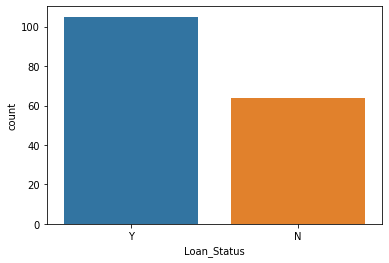

In [116]:
sns.countplot(x='Loan_Status', data=loan_data.loc[loan_data['Married'] == 'No',:], order=['Y','N'])

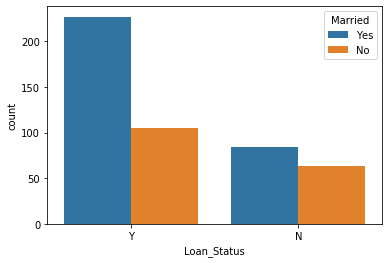

In [119]:
sns.countplot(x='Loan_Status', data=loan_data, order=['Y','N'],hue='Married')

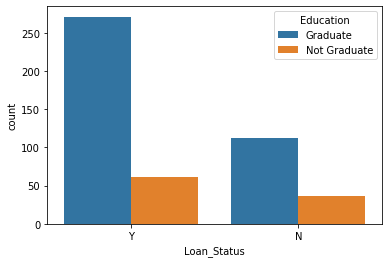

In [126]:
sns.countplot(x='Loan_Status', data=loan_data, order=['Y','N'],hue='Education')

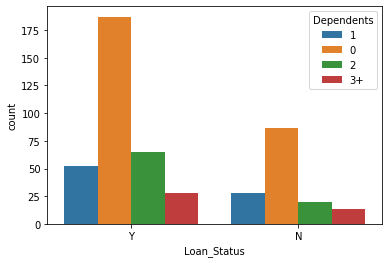

In [127]:
sns.countplot(x='Loan_Status', data=loan_data, order=['Y','N'],hue='Dependents')